# Linearni programi in Sage

## Razporeditev sredstev

Podjetje ima tri oddelke, ki poslujejo z: 30% dobičkom, 20% dobičkom in brez dobička. Med oddelke želimo razporediti 40.000 evrov sredstev, pri čemer mora 1. oddelek prejeti vsaj 8.000 evrov, 2. oddelek vsaj 10.000 evrov in 3. oddelek največ dvakrat toliko kot 2. oddelek. Kako naj razporedimo sredstva, da bomo dobili čimveč dobička?

In [2]:
p = MixedIntegerLinearProgram(maximization=True)
x = p.new_variable(real=True)
p.set_objective(0.3 * x[1] + 0.2 * x[2])
p.add_constraint(x[1] >= 8)
p.add_constraint(x[2] >= 10)
p.add_constraint(x[3] >= 0)
p.add_constraint(x[3] <= 2 * x[2])
p.add_constraint(x[1] + x[2] + x[3] <= 40)
p.solve()

11.0

In [3]:
p.get_values(x)

{1: 30.0, 2: 10.0, 3: 0.0}

## Grafično reševanje

Grafično in z `MixedIntegerLinearProgram` rešite linearni problem, podan z

\begin{align*}
\min x + y \\
x + 2y &\ge 1 \\
2x + y &\ge 1 \\
2x - y &\le 1
\end{align*}

In [4]:
nastavitve = {'plot_points': 1000, 'incol': 'lightblue', 'bordercol': 'gray'}

In [5]:
x, y = var('x y')
meje = [(x, 0, 1), (y, 0, 1)]
rp = region_plot([x + 2*y >= 1, 2*x + y >= 1, 2*x - y <= 1], *meje, **nastavitve)

@interact
def _(k=slider(0, 3, default=0.5, step_size=0.01, label='$k$')):
    show(rp + implicit_plot(x + y - k, *meje))

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg4NWM0NTVkYz4gd2l0aCAxIHdpZGdldAogIGs6IFRyYW5zZm9ybUZsb2F0U2xpZGVyKHZhbHVlPTAuNSwgZGVzY3JpcHRpb27igKY=


In [6]:
p = MixedIntegerLinearProgram(maximization=False)
v = p.new_variable(real=True)
p.set_objective(v[x] + v[y])
p.add_constraint(v[x] + 2 * v[y] >= 1)
p.add_constraint(2 * v[x] + v[y] >= 1)
p.add_constraint(2 * v[x] - v[y] <= 1)
p.solve()

0.6666666666666667

In [7]:
p.get_values(v)

{y: 0.33333333333333337, x: 0.3333333333333333}

## Proizvodnja fotoaparatov

Fotografski zanesenjak Niko N. je tik pred prazniki ustanovil s.p., v katerem bo proizvajal dve vrsti fotoaparatov: Minimum 3 in Optimum 7. Za vsak aparat Minimum 3 potrebuje 3 ure dela in material, vreden 70 evrov, za vsak Optimum 7 pa za 180 evrov materiala in 5 ur dela. Optimum 7 lahko proda za 300 evrov, Minimum 3 pa za 130 evrov. Katere fotoaparate naj naredi Niko, če ima 2100 evrov začetnega kapitala, s katerim lahko nakupi material, do praznikov pa ima le še 71 ur časa?

In [8]:
p = MixedIntegerLinearProgram(maximization=True)
v = p.new_variable(real=True)
p.set_objective((300 - 180) * v['opt'] + (130 - 70) * v['min'])
p.add_constraint(5 * v['opt'] + 3 * v['min'] <= 71)
p.add_constraint(180 * v['opt'] + 70 * v['min'] <= 2100)
p.solve()

1560.0

In [9]:
p.get_values(v)

{'min': 11.999999999999998, 'opt': 7.000000000000002}

## Analiza proizvodnje fotoaparatov

Nikov problem poskusite rešiti še grafično. Ko ga rešite, spreminjajte parametre in opazujte, kako se s tem spreminja množica dopustnih rešitev ter naklon grafa kriterijske funkcije.

In [10]:
x, y = var('x y')
meje = [(x, 0, 20), (y, 0, 30)]

@interact
def _(optimumUre=slider(0, 10, default=5, step_size=0.01),
      minimumUre=slider(0, 10, default=3, step_size=0.01),
      optimumStrosek=slider(0, 300, default=180, step_size=0.5),
      minimumStrosek=slider(0, 300, default=70, step_size=0.5),
      optimumCena=slider(0, 1000, default=300, step_size=2),
      minimumCena=slider(0, 1000, default=130, step_size=2),
      kapital=slider(0, 5000, default=2100, step_size=10),
      cas=slider(0, 200, default=71, step_size=0.5),
      dobicek=slider(0, 3000, default=1560, step_size=5),
      auto_update=False):
    show(region_plot([optimumUre * x + minimumUre * y <= cas, optimumStrosek * x + minimumStrosek * y <= kapital],
                     *meje, **nastavitve) +
         implicit_plot((optimumCena - optimumStrosek) * x + (minimumCena - minimumStrosek) * y - dobicek, *meje) +
         text("""
max %.2f opt + %.2f min  p.p.
        %.2f opt + %.2f min <= %.2f
        %.2f opt + %.2f min <= %.2f
              """ % (optimumCena - optimumStrosek, minimumCena - minimumStrosek,
                     optimumUre, minimumUre, cas, optimumStrosek, minimumStrosek, kapital),
              (3, 29), axes=False, horizontal_alignment='left'))

TWFudWFsIGludGVyYWN0aXZlIGZ1bmN0aW9uIDxmdW5jdGlvbiBfIGF0IDB4ODY0OTlhM2M+IHdpdGggOSB3aWRnZXRzCiAgb3B0aW11bVVyZTogVHJhbnNmb3JtRmxvYXRTbGlkZXIodmFsdWXigKY=


## Sestavljanje jedilnika

Z jedilnikom, sestavljenim iz živil v spodnji tabeli želimo zadostiti dnevnim potrebam po vsaj 2000 kCal energije, 55 g beljakovin in 800 mg kalcija. Kaj naj pojemo, da bomo za živila porabili čim manj denarja, hkrati pa ne bomo jedli preveč enolične hrane (glej zadnji stolpec)?

| živilo    | porcija    | energija (kCal) | beljakovine (g) | kalcij (mg) | cena (€) | max. št. porcij |
| --------- | --------   | --------------- | --------------- | ----------- | -------- | --------------- |
| kaša      | 28 g       | 110             | 4               | 2           | 3        | 4               |
| piščanec	| 100 g      | 205             | 32              | 12          | 24       | 3               |
| jajca     | 2 kom.     | 160             | 13              | 54          | 13       | 2               |
| mleko     | 237 cm$^3$ | 160             | 8               | 285         | 9        | 8               |
| kremšnita | 170 g	     | 420             | 4               | 22          | 20       | 2               |
| pasulj    | 260 g      | 260             | 14              | 80          | 19       | 2               |

In [11]:
p = MixedIntegerLinearProgram(maximization=False)
v = p.new_variable(real=True)
p.set_objective(3 * v['kasa'] + 24 * v['piscanec'] + 13 * v['jajca'] +
                9 * v['mleko'] + 20 * v['kremsnita'] + 19 * v['pasulj'])
p.add_constraint(110 * v['kasa'] + 205 * v['piscanec'] + 160 * v['jajca'] +
                 160 * v['mleko'] + 420 * v['kremsnita'] + 260 * v['pasulj'] >= 2000)
p.add_constraint(4 * v['kasa'] + 32 * v['piscanec'] + 13 * v['jajca'] +
                 8 * v['mleko'] + 4 * v['kremsnita'] + 14 * v['pasulj'] >= 55)
p.add_constraint(2 * v['kasa'] + 12 * v['piscanec'] + 54 * v['jajca'] +
                 285 * v['mleko'] + 22 * v['kremsnita'] + 80 * v['pasulj'] >= 800)
p.add_constraint(0 <= v['kasa'] <= 4)
p.add_constraint(0 <= v['piscanec'] <= 3)
p.add_constraint(0 <= v['jajca'] <= 2)
p.add_constraint(0 <= v['mleko'] <= 8)
p.add_constraint(0 <= v['kremsnita'] <= 2)
p.add_constraint(0 <= v['pasulj'] <= 2)
p.solve()

92.49999999999999

In [12]:
p.get_values(v)

{'jajca': 0.0,
 'kasa': 4.0,
 'kremsnita': 2.0,
 'mleko': 4.499999999999999,
 'pasulj': 0.0,
 'piscanec': 0.0}

## Največja včrtana krožnica

Poiščite največjo krožnico, vsebovano v večkotniku, podanem z enačbami:

\begin{align*}
-x + y &\le 4 \\
y &\le 5 \\
2x + y &\le 15 \\
{x \over 2} + y &\ge 1
\end{align*}

V pomoč naj vam bo, da je točka $x$ od hiperravnine z enačbo $a^\top x = b$ oddaljena ${{b - a^\top x} \over {\lVert a \rVert}}$.

In [13]:
p = MixedIntegerLinearProgram(maximization=True)
v = p.new_variable(real=True)
r, x, y = (v[i] for i in "rxy")
p.set_objective(r)
p.add_constraint(r * sqrt(2) <= 4 + x - y)
p.add_constraint(r * 1 <= 5 - y)
p.add_constraint(r * sqrt(5) <= 15 - 2*x - y)
p.add_constraint(r * sqrt(5)/2 <= -1 + x/2 + y)
p.add_constraint(r >= 0)
p.solve()

2.6781472845828778

In [14]:
res = p.get_values(v)
res

{'r': 2.6781472845828778, 'x': 3.3448139512495434, 'y': 2.3218527154171227}

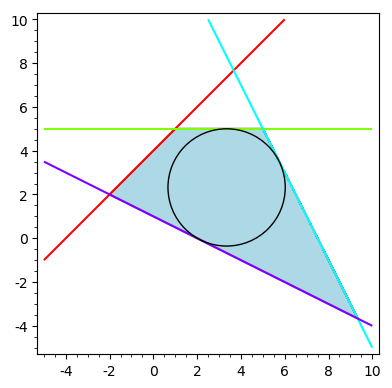

In [15]:
x, y = var('x y')
meje = [(x, -5, 10), (y, -5, 10)]
sum((implicit_plot(eq, color=col, *meje) for eq, col in zip([-x + y - 4, y - 5, 2*x + y - 15, x/2 + y - 1], rainbow(4))),
   region_plot([-x + y <= 4, y <= 5, 2*x + y <= 15, x/2 + y >= 1], *meje, **nastavitve) +
   circle((res['x'], res['y']), res['r'], color='black'))

## Naftna rafinerija

Rafinerija iz nafte tipov 1 in 2 meša bencin in kurilno olje. Na voljo ima 5000 sodčkov nafte tipa 1 s kvaliteto 10 in 10000 sodčkov nafte tipa 2 s kvaliteto 5. Povprečna kvaliteta bencina mora biti vsaj 8, povprečna kvaliteta kurilnega olja pa vsaj 6. Za vsak dolar reklame za kurilno olje proda 10 sodčkov kurilnega olja po ceni 20 dolarjev za sodček, za vsak dolar reklame za bencin pa 5 sodčkov bencina po ceni 25 dolarjev za sodček. Kako naj nameša nafto, da bo iztržila čimveč dobička?

In [16]:
p = MixedIntegerLinearProgram(maximization=True)
bencin = p.new_variable(real=True)
kurilno_olje = p.new_variable(real=True)
p.set_objective((25 - 1/5) * (bencin[1] + bencin[2]) + (20 - 1/10) * (kurilno_olje[1] + kurilno_olje[2]))
p.add_constraint(bencin[1] + kurilno_olje[1] <= 5000)
p.add_constraint(bencin[2] + kurilno_olje[2] <= 10000)
p.add_constraint(10 * bencin[1] + 5 * bencin[2] >= 8 * (bencin[1] + bencin[2]))
p.add_constraint(10 * kurilno_olje[1] + 5 * kurilno_olje[2] >= 6 * (kurilno_olje[1] + kurilno_olje[2]))
p.solve()

323000.0

In [17]:
p.get_values(bencin)

{1: 3000.0, 2: 1999.9999999999998}

In [18]:
p.get_values(kurilno_olje)

{1: 1999.9999999999995, 2: 8000.0}

## Mešanje tonikov

Na voljo imamo zdravilne tonike A, B in C z vsebnostjo zdravilnh učinkovin I, II in III, podano v spodnji tabeli. Z mešanjem tonikov želimo dobiti napitek, ki bo imel vsebnosti učinkovin, kot so navedene v zadnji vrstici tabele. Natančnih vrednosti ni moč doseči, zato za mero kvalitete mešanice vzamemo po absolutni vrednosti največje odstopanje posamezne učinkovine od predpisane vrednosti (v mešanici, ki vsebuje enak delež vsakega tonika, je ta vrednost enaka 2/3). Kakšni so deleži v najboljši mešanici?

| tonik  |  I | II | III |
| ------ | -- | -- | --- |
| A      | 10 |  2 |   5 |
| B      | 15 |  4 |   2 |
| C      | 20 |  3 |   3 |
| iskani | 15 |  3 |   4 |

In [19]:
spremenljivke = 'abcz'
koeficienti = [[10, 15, 20, -15],
                [2,  4,  3,  -3],
                [5,  2,  3,  -4]]

def izraz(koef, znak, v):
    return sum(znak * x * v[k] for x, k in zip(koef, spremenljivke))
               
def resitev(koef, znak):
    p = MixedIntegerLinearProgram(maximization=False)
    v = p.new_variable(real=True)
    ciljna = izraz(koef, znak, v)
    p.set_objective(ciljna)
    p.add_constraint(sum(v[k] for k in spremenljivke[:3]) == 1)
    p.add_constraint(v[spremenljivke[-1]] == 1)
    for k in spremenljivke:
        p.add_constraint(v[k] >= 0)
    for z in [-1, 1]:
        for r in koeficienti:
            p.add_constraint(ciljna >= izraz(r, z, v))
    try:
        opt = p.solve()
    except sage.numerical.mip.MIPSolverException:
        return (Infinity, None)
    return (opt, p.get_values(v))

min((resitev(koef, znak) for znak in [-1, 1] for koef in koeficienti), key=lambda t: t[0])

(0.27777777777777735,
 {'a': 0.4444444444444446,
  'b': 0.1666666666666669,
  'c': 0.3888888888888886,
  'z': 1.0})

In [20]:
a, b, c, z = spr = var(' '.join(spremenljivke))
razlike = [sum(k*x for k, x in zip(koef, spr)).subs(z == 1, c == 1 - a - b) for koef in koeficienti]
meje = [(a, 0, 1), (b, 0, 1)]
nast = {'plot_points': 200, 'bordercol': 'gray'}

pogoji = [[a + b <= 1] + [znak * ciljna >= z * r for z in [-1, 1] for r in razlike if (z, r) != (znak, ciljna)]
          for znak in [-1, 1] for ciljna in razlike]
obmocja = sum(region_plot(pogoj, incol=barva, *meje, **nast) for pogoj, barva in zip(pogoji, rainbow(6)))

@interact
def _(k=slider(0, 1, default=1, step_size=0.01)):
    warnings.filterwarnings("ignore")
    show(obmocja + region_plot([znak * ciljna <= k for znak in [-1, 1] for ciljna in razlike],
                               incol='black', alpha=0.5, bordercol='magenta', borderwidth=3, plot_points=200, *meje))

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg4MmQwNGQ0Yz4gd2l0aCAxIHdpZGdldAogIGs6IFRyYW5zZm9ybUZsb2F0U2xpZGVyKHZhbHVlPTEuMCwgZGVzY3JpcHRpb27igKY=
